In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
ds=pd.read_csv("Social_Network_Ads.csv")
ds


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
x=ds[["Age","EstimatedSalary"]]
y=ds[["Purchased"]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier
Dec_cls=DecisionTreeClassifier(criterion='entropy',random_state=0)
Dec_cls.fit(x_train,y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


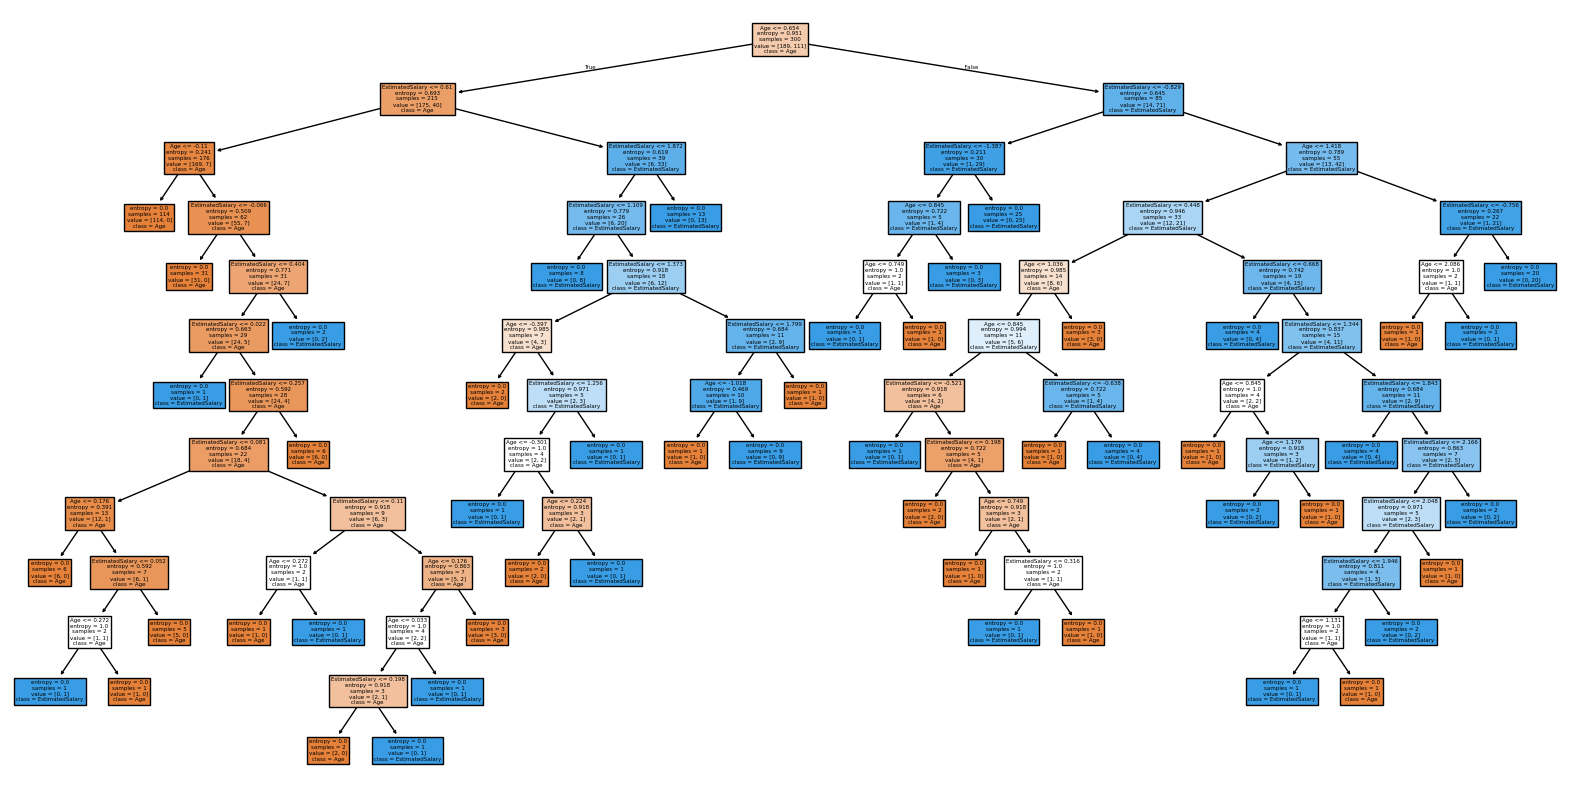

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(Dec_cls,filled=True,feature_names=['Age','EstimatedSalary'],class_names=['Age','EstimatedSalary'])
plt.show()

In [14]:
result=Dec_cls.predict(sc.transform([[10,150000]])) 
result

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [16]:
#predicting the test set results:
y_pred=Dec_cls.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
     Purchased
132          0
309          0
341          0
196          0
246          0
..         ...
146          1
135          0
390          1
264          1
364          1

[100 rows x 1 columns]


In [18]:
#accuracy score:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[62  6]
 [ 3 29]]


0.91